In [4]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [6]:
# Importing Data set
carprices = pd.read_csv("CarPrice_Assignment.csv")

In [7]:
carprices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
print(carprices.info())
print(carprices.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Data Cleansing

In [9]:
print(carprices.aspiration.unique())
print(carprices.symboling.unique())
print(carprices.fueltype.unique())
print(carprices.doornumber.unique())
print(carprices.carbody.unique())
print(carprices.drivewheel.unique())
print(carprices.enginelocation.unique())
print(carprices.enginetype.unique())
print(carprices.cylindernumber.unique())
print(carprices.enginesize.unique())
print(carprices.fuelsystem.unique())

['std' 'turbo']
[ 3  1  2  0 -1 -2]
['gas' 'diesel']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
[130 152 109 136 131 108 164 209  61  90  98 122 156  92  79 110 111 119
 258 326  91  70  80 140 134 183 234 308 304  97 103 120 181 151 194 203
 132 121 146 171 161 141 173 145]
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [10]:
# Deriving Car Brand from car Name

carprices['CarName'] = carprices['CarName'].str.split()
carprices['CarName'] = carprices['CarName'].apply(lambda x:x[0])
carprices['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Observation: CarName has multiplenames for same brand,need to correct it

In [11]:
carprices['CarName']= carprices['CarName'].replace({'vw':'volkswagen','vokswagen':'volkswagen','nissan':'Nissan',
                                                    'toyouta':'toyota','maxda':'mazda','porcshce':'porsche'},regex=True)
carprices['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
carprices['fuelsystem'] = carprices['fuelsystem'].replace({'mfi':'mpfi','spfi':'spdi'})

In [13]:
#car_id is unnecessary column--> as it is a numering column, so we can drop
carprices.drop(['car_ID'],axis=1,inplace=True)

# Step 2 : Data Visualization and EDA

##### Let's now visualise our data using seaborn.  visualise which variables are most correlated to Carprice.


Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

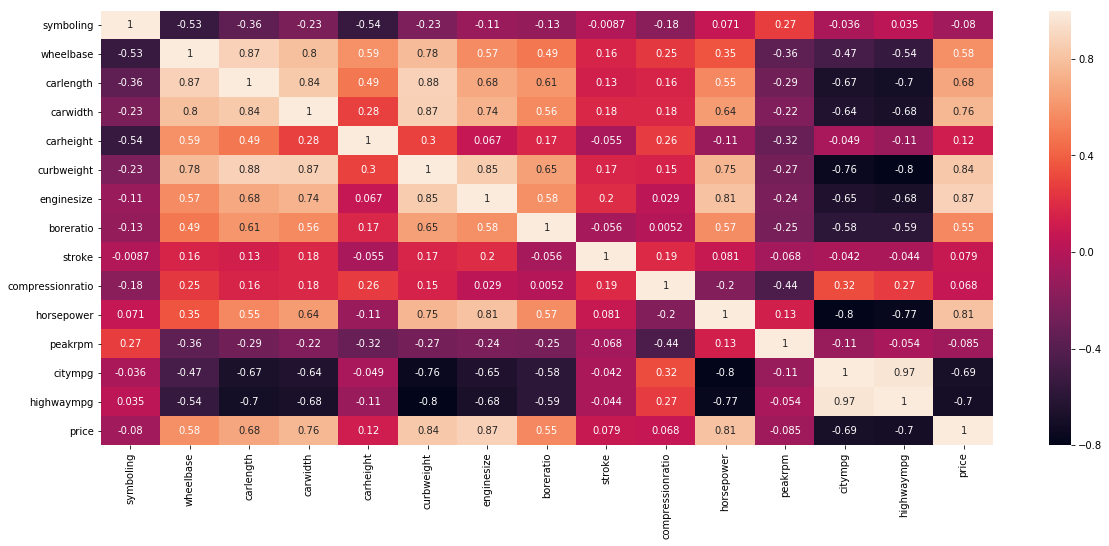

In [14]:
plt.figure(figsize=(20,8))
sns.heatmap(carprices.corr(),annot=True)
plt.show()

In [15]:
# Observation: price is highly correlated with engine size,curbweight,horsepower,car(width,length,wheelbase)
# where as engine size is related with curbweight,horsepower,carwidth
#curbweight is highly correlated with many parameters
        #carlength,carwidth,enginesize,price,wheelbase,horsepower
        #boreratio-curbweight,carlength
#Horsepower is highly correlated with enginesize,curbweight,price
#car measurements(length,width,wheelbase)is highy correlated with above paarmeters.
#city rpm and highway rpm are 0.97 corelated.

In [16]:
carprices1 = carprices[['carlength','carwidth','carheight','curbweight','wheelbase','enginesize','price']]

In [17]:
carprices2 = carprices[['boreratio','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

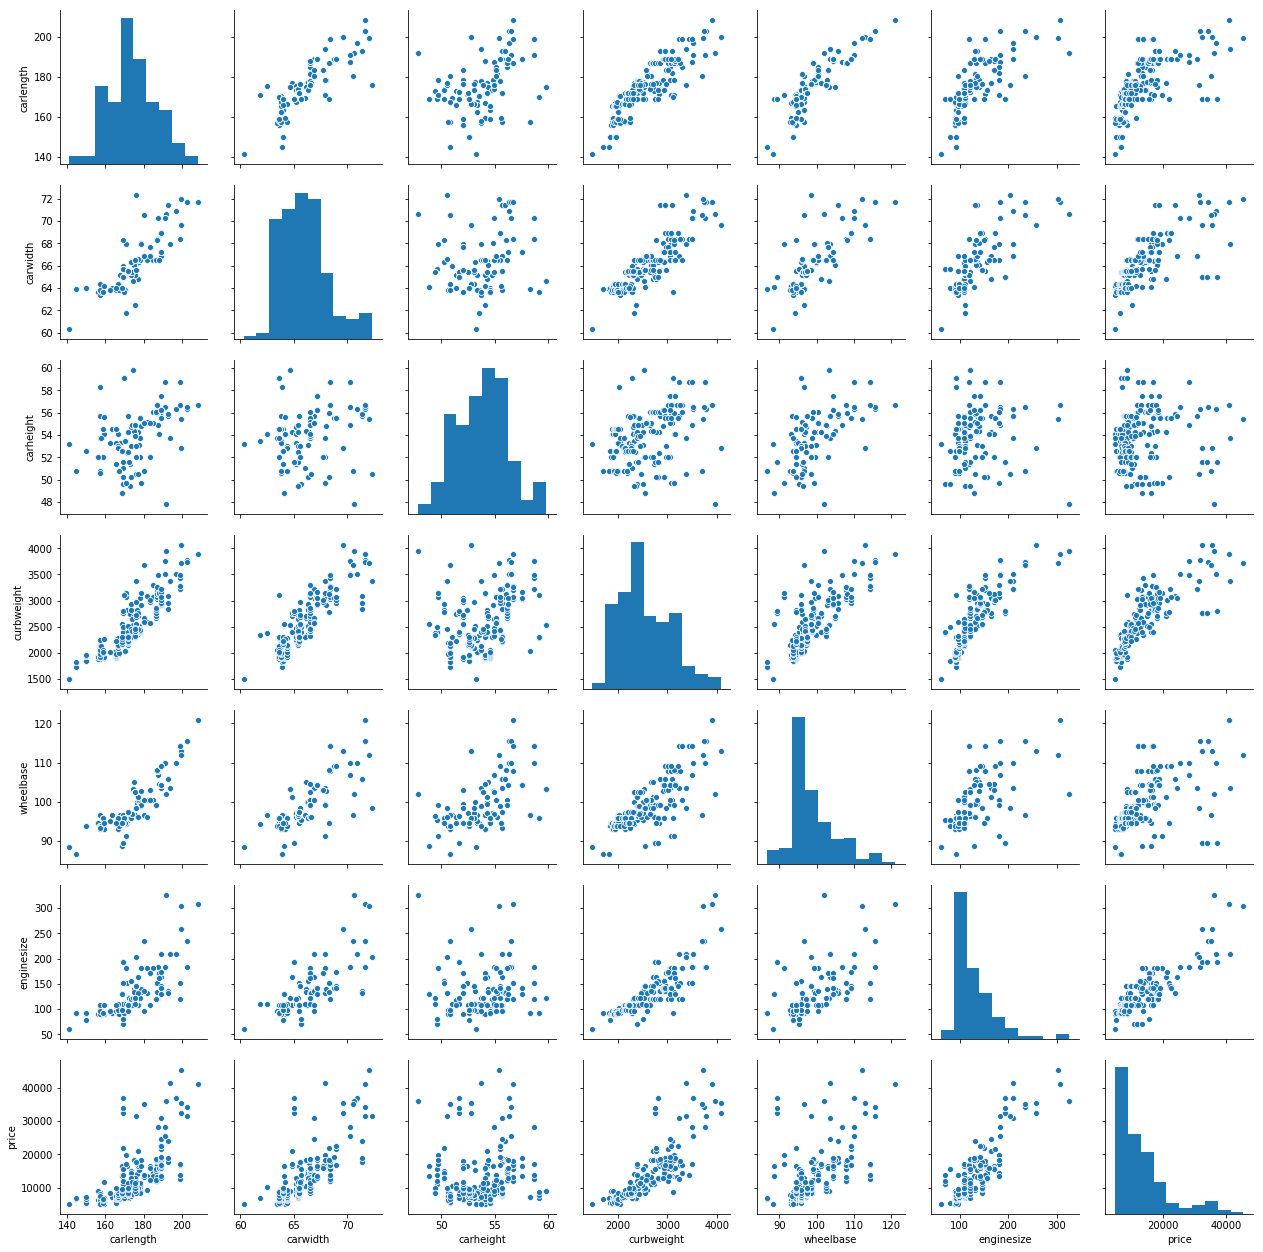

In [18]:
sns.pairplot(carprices1)
plt.show()

#### Observation: 
            1.Price has linear realtionship with Curbweight and enginesize
            2.wheelbase has some linear relationship with carlength and curbweight(may have high correlation)
            3.carlength,carwidth and curb weight are having linear relation ship with some noise


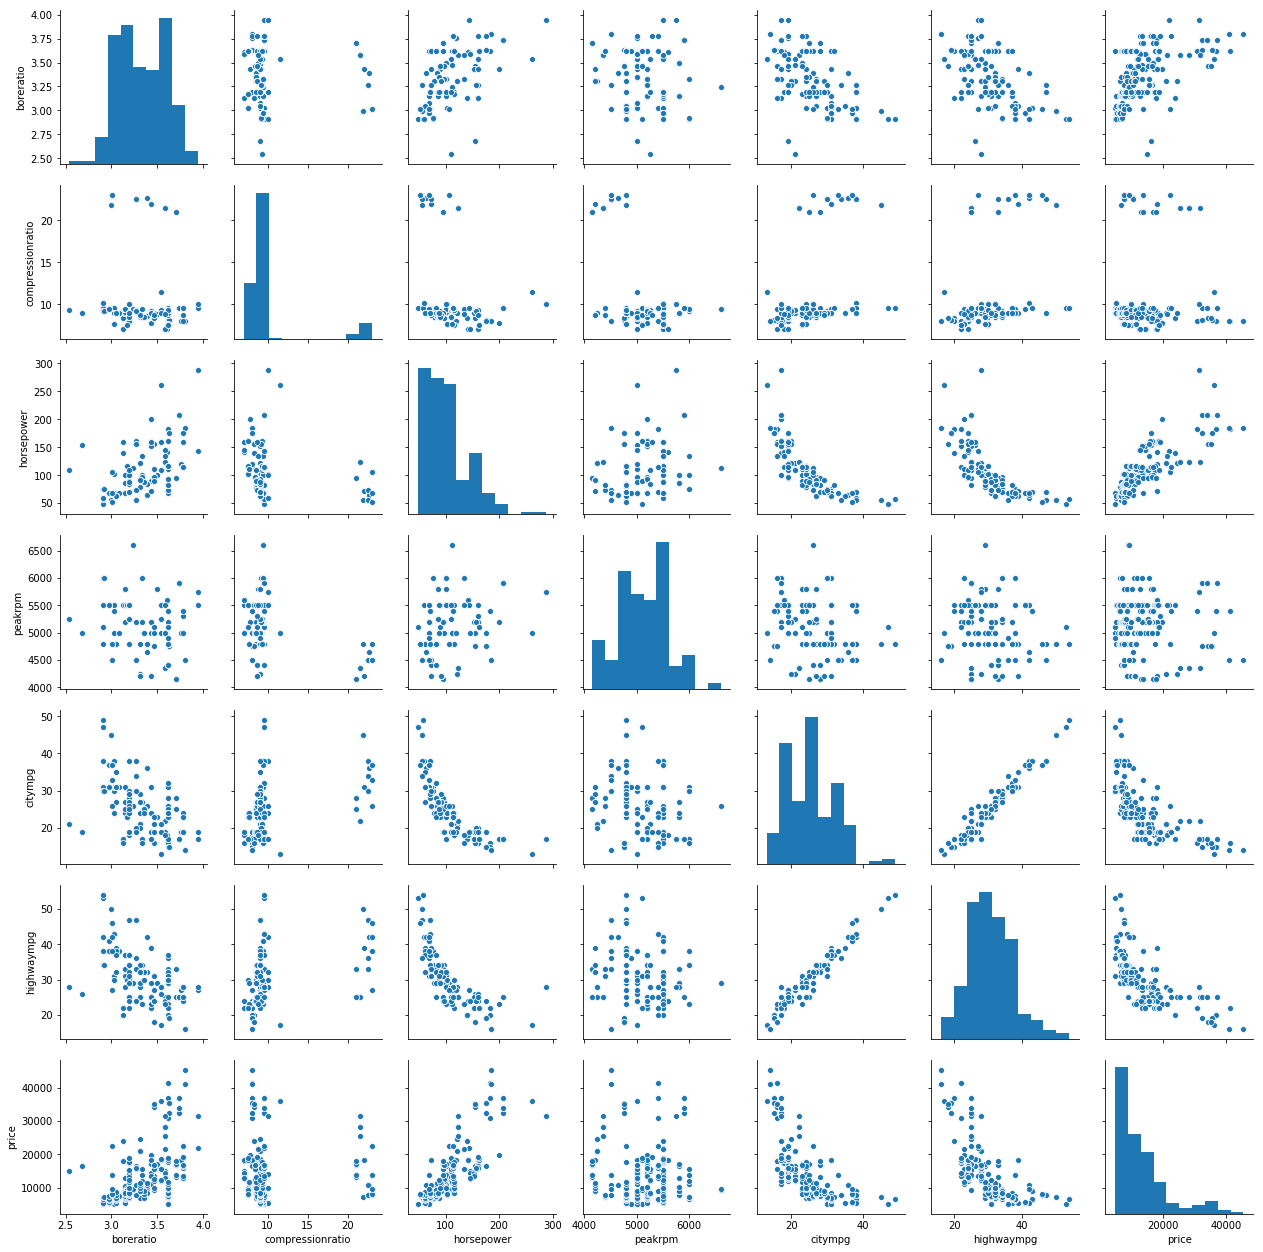

In [19]:
sns.pairplot(carprices2)
plt.show()

#### Observation:
    1.Highwaympg and citympg are linear related
    2.Horse power and price seems to be linearly related
    3.In both the plots ,its an intresting observation that price is mostly distributed near 20000 bucket
    

## Step 3.1:Data Preparation

#### Visualising Categorical Variables,As you might have noticed, there are a few categorical variables as well.

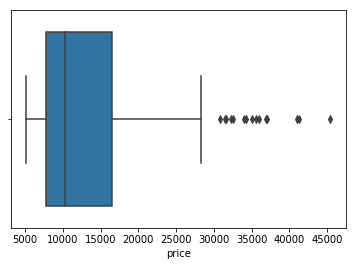

In [20]:
# Price has outliers 
sns.boxplot(x=carprices['price'])

In [21]:
## Outlier treatment based on the box plot
carprices = carprices.loc[carprices['price']<=27000]

In [22]:
carprices.shape

(188, 25)

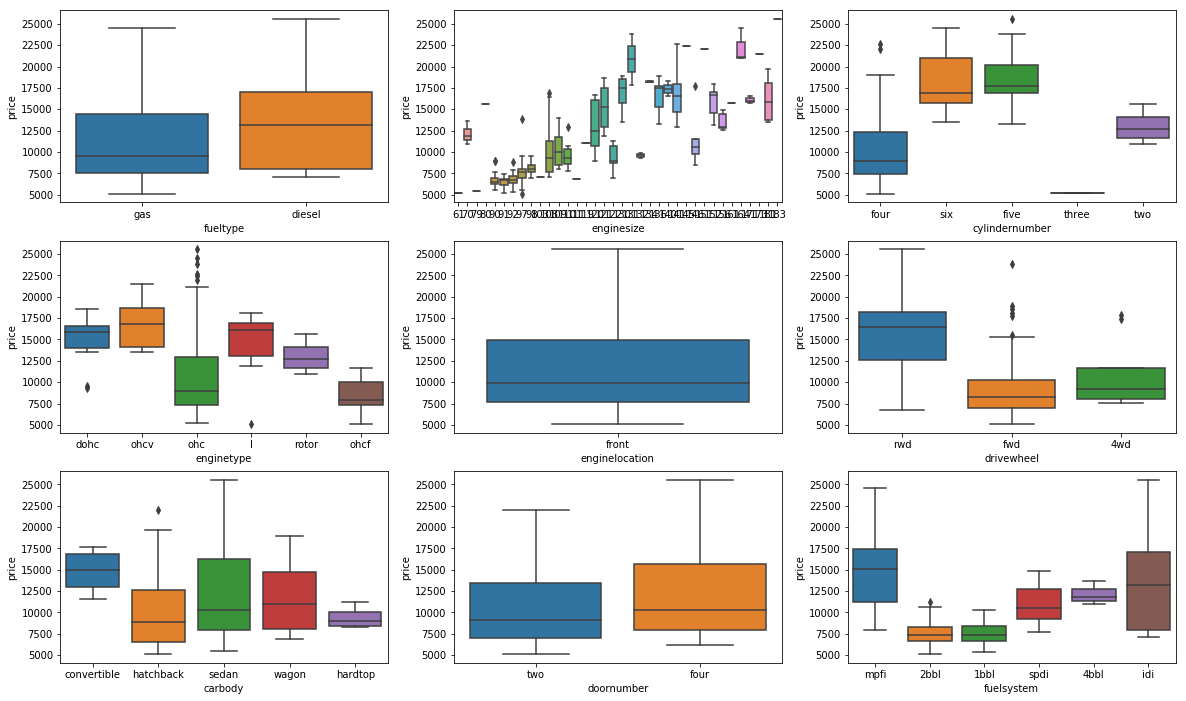

In [23]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x="fueltype",y="price",data=carprices)
plt.subplot(3,3,2)
sns.boxplot(x="enginesize",y="price",data=carprices)
plt.subplot(3,3,3)
sns.boxplot(x="cylindernumber",y="price",data=carprices)
plt.subplot(3,3,4)
sns.boxplot(x="enginetype",y="price",data=carprices)
plt.subplot(3,3,5)
sns.boxplot(x="enginelocation",y="price",data=carprices)
plt.subplot(3,3,6)
sns.boxplot(x="drivewheel",y="price",data=carprices)
plt.subplot(3,3,7)
sns.boxplot(x="carbody",y="price",data=carprices)
plt.subplot(3,3,8)
sns.boxplot(x="doornumber",y="price",data=carprices)
plt.subplot(3,3,9)
sns.boxplot(x="fuelsystem",y="price",data=carprices)
plt.show()

In [24]:
# As there is few data with cylinder number 2 and 3 we can create a category less than 4 

carprices['cylindernumber'] = carprices['cylindernumber'].replace({'two':'lt4','three':'lt4'})

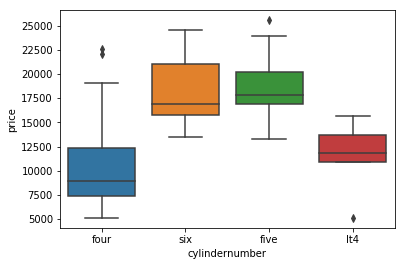

In [25]:
sns.boxplot(x="cylindernumber",y="price",data=carprices)

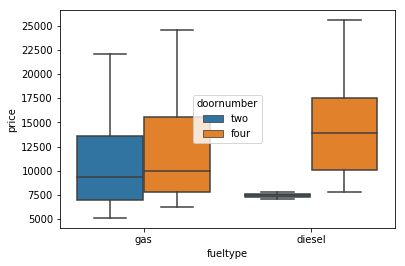

In [26]:

### OBSERVATION : lets see if fueltype,door number and price location has any correlation

sns.boxplot(x="fueltype",y="price",hue="doornumber",data=carprices)
plt.show()

## Derived Variables

In [27]:
## hp2wRatio : power to weight ratio = horsepower / curbweight
carprices['hp2wRatio'] = carprices['horsepower']/carprices['curbweight']

# bore : bore size
carprices['bore'] = carprices['boreratio'] * carprices['stroke']


# wb2lRatio : wheelbase to length ratio
carprices['wb2lenRatio'] = carprices['wheelbase'] / carprices['carlength']

# rpm2hpRatio : RPM to horsepower ratio
carprices['rpm2hpRatio'] = carprices['peakrpm'] / carprices['horsepower']

### 3.2  Data Preparation

- You can see that your dataset has many categorial columns with binomial values eg: gas/diesel or two/four or front/rear or rwd/fwd/4wd

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them (n-1)to 1s and 0s, based on number of variables(n).

### Dummy Variables

In [28]:
# below are the categorical variables
print(carprices.aspiration.unique())
print(carprices.symboling.unique())
print(carprices.fueltype.unique())
print(carprices.doornumber.unique())
print(carprices.carbody.unique())
print(carprices.drivewheel.unique())
print(carprices.enginetype.unique())
print(carprices.cylindernumber.unique())
print(carprices.fuelsystem.unique())

['std' 'turbo']
[ 3  1  2  0 -1 -2]
['gas' 'diesel']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'lt4']
['mpfi' '2bbl' '1bbl' 'spdi' '4bbl' 'idi']


In [29]:
carprices['fueltype'] = carprices['fueltype'].apply(lambda x: 1 if x == 'gas' else 0)

In [30]:
carprices['doornumber'] = carprices['doornumber'].apply(lambda x: 1 if x == 'four' else 0)

In [31]:
## as engine location is ['front'], we can convert it to  1 and 0
print(carprices.enginelocation.unique())
carprices['enginelocation'] = carprices['enginelocation'].apply(lambda x: 1 if x == 'front' else 0)

['front']


In [32]:
Car_Name=pd.get_dummies(carprices['CarName'], drop_first = True)
Aspiration=pd.get_dummies(carprices['aspiration'], drop_first = True)
Symboling=pd.get_dummies(carprices['symboling'], drop_first = True)
#fuel_type = pd.get_dummies(carprices['fueltype'], drop_first = True)
#door_number = pd.get_dummies(carprices['doornumber'], drop_first = True)
car_body = pd.get_dummies(carprices['carbody'], drop_first = True)
drive_wheel = pd.get_dummies(carprices['drivewheel'], drop_first = True)
#engine_location = pd.get_dummies(carprices['enginelocation'], drop_first = True)
engine_type = pd.get_dummies(carprices['enginetype'], drop_first = True)
cylinder_number = pd.get_dummies(carprices['cylindernumber'], drop_first = True)
#engine_size = pd.get_dummies(carprices['enginesize'], drop_first = True)
fuel_system = pd.get_dummies(carprices['fuelsystem'], drop_first = True)

In [33]:
# Add the results(dummies) to the original  dataframe
#carprices= pd.concat([carprices,fuel_type],axis=1)
carprices=pd.concat([carprices,Car_Name],axis=1)
# Drop original column as we have created the dummies for it
#carprices.drop(['fueltype'],axis=1,inplace=True)
carprices.drop(['CarName'],axis=1,inplace=True)

In [34]:

carprices=pd.concat([carprices,Aspiration],axis=1)
carprices=pd.concat([carprices,Symboling],axis=1)
#carprices= pd.concat([carprices,door_number],axis=1)
carprices= pd.concat([carprices,car_body],axis=1)
carprices= pd.concat([carprices,drive_wheel],axis=1)
#carprices= pd.concat([carprices,engine_location],axis=1)
carprices= pd.concat([carprices,engine_type],axis=1)
carprices= pd.concat([carprices,cylinder_number],axis=1)
#carprices= pd.concat([carprices,engine_size],axis=1)
carprices= pd.concat([carprices,fuel_system],axis=1)
# Drop original column as we have created the dummies for it

carprices.drop(['aspiration'],axis=1,inplace=True)
carprices.drop(['symboling'],axis=1,inplace=True)
#carprices.drop(['doornumber'],axis=1,inplace=True)
carprices.drop(['carbody'],axis=1,inplace=True)
carprices.drop(['drivewheel'],axis=1,inplace=True)
#carprices.drop(['enginelocation'],axis=1,inplace=True)
carprices.drop(['enginetype'],axis=1,inplace=True)
carprices.drop(['cylindernumber'],axis=1,inplace=True)
#carprices.drop(['enginesize'],axis=1,inplace=True)
carprices.drop(['fuelsystem'],axis=1,inplace=True)

In [35]:
carprices.info()
#carprices[carprices['mfi'] == 1] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 204
Data columns (total 66 columns):
fueltype            188 non-null int64
doornumber          188 non-null int64
enginelocation      188 non-null int64
wheelbase           188 non-null float64
carlength           188 non-null float64
carwidth            188 non-null float64
carheight           188 non-null float64
curbweight          188 non-null int64
enginesize          188 non-null int64
boreratio           188 non-null float64
stroke              188 non-null float64
compressionratio    188 non-null float64
horsepower          188 non-null int64
peakrpm             188 non-null int64
citympg             188 non-null int64
highwaympg          188 non-null int64
price               188 non-null float64
hp2wRatio           188 non-null float64
bore                188 non-null float64
wb2lenRatio         188 non-null float64
rpm2hpRatio         188 non-null float64
alfa-romero         188 non-null uint8
audi         

## Splitting the Data into Training and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df_train,df_test=train_test_split(carprices,train_size=0.7,test_size=0.3,random_state=100)


### Rescaling the Features 
##### We will use MinMax scaling.

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [39]:
# Apply the scaler fit to all variables except dummy variables

In [40]:
num_vars = ['carlength','carwidth','carheight','curbweight','wheelbase','boreratio','compressionratio',
            'horsepower','peakrpm','citympg','highwaympg','price','stroke','enginesize']

In [41]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
#df_train.info()

### Dividing into X and Y sets for the model building


In [42]:
y_train=df_train.pop('price')

In [43]:
X_train=df_train


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 34 to 8
Data columns (total 65 columns):
fueltype            131 non-null int64
doornumber          131 non-null int64
enginelocation      131 non-null int64
wheelbase           131 non-null float64
carlength           131 non-null float64
carwidth            131 non-null float64
carheight           131 non-null float64
curbweight          131 non-null float64
enginesize          131 non-null float64
boreratio           131 non-null float64
stroke              131 non-null float64
compressionratio    131 non-null float64
horsepower          131 non-null float64
peakrpm             131 non-null float64
citympg             131 non-null float64
highwaympg          131 non-null float64
hp2wRatio           131 non-null float64
bore                131 non-null float64
wb2lenRatio         131 non-null float64
rpm2hpRatio         131 non-null float64
alfa-romero         131 non-null uint8
audi                131 non-null uint8
bmw 

## Building our model

 using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [45]:
# Importing Linear regression and RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# using RFE for all the variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(lm,20)
rfe = rfe.fit(X_train, y_train)

#rfe1=RFE(lm,15)
#rfe1=rfe1.fit(X_train,y_train)

In [47]:
#columns we are taking further to build a model based on RFE support
col =X_train.columns[rfe.support_]
#list(zip(X_train.columns,rfe.ranking_))
col

Index(['fueltype', 'wheelbase', 'carlength', 'carwidth', 'compressionratio',
       'horsepower', 'hp2wRatio', 'wb2lenRatio', 'audi', 'bmw', 'buick',
       'saab', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rotor',
       'lt4', 'idi'],
      dtype='object')

In [48]:
#col =['fueltype', 'wheelbase', 'carlength', 'carwidth', 'compressionratio',
#       'horsepower', 'hp2wRatio', 'wb2lenRatio', 'audi', 'bmw', 'buick',
#       'saab', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rotor',
#       'lt4', 'idi']
#col

In [49]:
#columns we are dropping from the model based on RFE support
X_train.columns[~rfe.support_]

Index([    'doornumber', 'enginelocation',      'carheight',     'curbweight',
           'enginesize',      'boreratio',         'stroke',        'peakrpm',
              'citympg',     'highwaympg',           'bore',    'rpm2hpRatio',
          'alfa-romero',      'chevrolet',          'dodge',          'honda',
                'isuzu',          'mazda',        'mercury',     'mitsubishi',
              'peugeot',       'plymouth',        'porsche',        'renault',
               'subaru',         'toyota',     'volkswagen',          'turbo',
                     -1,                0,                1,                2,
                      3,            'fwd',            'rwd',              'l',
                  'ohc',           'ohcf',           'ohcv',           'four',
                  'six',           '2bbl',           '4bbl',           'mpfi',
                 'spdi'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [50]:
#Creating X test df with RFE selected columns
x_train_rfe = X_train[col]

In [51]:
# Adding a constant variable
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [52]:
#runnig the model
lm = sm.OLS(y_train,x_train_rfe).fit()

In [53]:
#lets see the summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     79.72
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           3.42e-55
Time:                        00:09:19   Log-Likelihood:                 173.29
No. Observations:                 131   AIC:                            -308.6
Df Residuals:                     112   BIC:                            -253.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7108      2.479      0.690      0.492      -3.202       6.624
fueltype             0.8774      1.255      0.699      0.486      -1.610       3.364
wheelbase            0.7411      1.024      0.724      0.471      -1.288       2.770
carlength           -0.8179      1.187     -0.689      0.492      -3.169       1.534
carwidth             0.2386      0.084      2.839      0.005       0.072       0.405
compressionratio     0.1599      0.192      0.831      0.408      -0.221       0.541
horsepower           1.0766      0.137      7.865      0.000       0.805       1.348
hp2wRatio          -12.2625      3.249     -3.774      0.000     -18.700      -5.825
wb2lenRatio         -3.4464      6.256     -0.551      0.583     -15.841       8.949
audi                 0.1642      0.034      4.781      0.000       0.096       0.232
bmw                  0.4023      0.040      9.937      0.000       0.322       0.482
buick                0.2581      0.076      3.418      0.001       0.108       0.408
saab                 0.1304      0.056      2.323      0.022       0.019       0.242
volvo                0.0834      0.029      2.838      0.005       0.025       0.142
hardtop             -0.1927      0.071     -2.703      0.008      -0.334      -0.051
hatchback           -0.2198      0.054     -4.095      0.000      -0.326      -0.113
sedan               -0.1888      0.054     -3.520      0.001      -0.295      -0.083
wagon               -0.2113      0.055     -3.876      0.000      -0.319      -0.103
rotor                0.0616      0.020      3.104      0.002       0.022       0.101
lt4                  0.0616      0.020      3.104      0.002       0.022       0.101
idi                  0.8334      1.229      0.678      0.499      -1.602       3.269
==============================================================================
Omnibus:                       10.462   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.998
Skew:                           0.483   Prob(JB):                      0.00151
Kurtosis:                       4.203   Cond. No.                     1.14e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.29e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
# Higher P value needs to be eliminated as it is insignificant
#wb2lenRatio	-3.4464(co-eff) 	0.583(p value)	
x_train_new1 = x_train_rfe.drop(['wb2lenRatio'],axis=1)
x_train_lm1 = sm.add_constant(x_train_new1)
lm1 = sm.OLS(y_train,x_train_lm1).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     84.92
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           4.24e-56
Time:                        00:09:19   Log-Likelihood:                 173.11
No. Observations:                 131   AIC:                            -310.2
Df Residuals:                     113   BIC:                            -258.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3461      0.109      3.186      0.002       0.131       0.561
fueltype             0.1866      0.059      3.175      0.002       0.070       0.303
wheelbase            0.1786      0.078      2.298      0.023       0.025       0.333
carlength           -0.1662      0.094     -1.767      0.080      -0.352       0.020
carwidth             0.2267      0.081      2.800      0.006       0.066       0.387
compressionratio     0.1419      0.189      0.750      0.455      -0.233       0.516
horsepower           1.0752      0.136      7.880      0.000       0.805       1.345
hp2wRatio          -12.2493      3.239     -3.782      0.000     -18.666      -5.832
audi                 0.1610      0.034      4.771      0.000       0.094       0.228
bmw                  0.3988      0.040     10.005      0.000       0.320       0.478
buick                0.2591      0.075      3.443      0.001       0.110       0.408
saab                 0.1150      0.049      2.368      0.020       0.019       0.211
volvo                0.0799      0.029      2.794      0.006       0.023       0.136
hardtop             -0.1929      0.071     -2.713      0.008      -0.334      -0.052
hatchback           -0.2211      0.053     -4.136      0.000      -0.327      -0.115
sedan               -0.1890      0.053     -3.535      0.001      -0.295      -0.083
wagon               -0.2151      0.054     -3.990      0.000      -0.322      -0.108
rotor                0.0640      0.019      3.311      0.001       0.026       0.102
lt4                  0.0640      0.019      3.311      0.001       0.026       0.102
idi                  0.1595      0.123      1.301      0.196      -0.083       0.402
==============================================================================
Omnibus:                       10.929   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.091
Skew:                           0.486   Prob(JB):                     0.000871
Kurtosis:                       4.279   Cond. No.                     7.68e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.53e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
# compressionratio	0.1419(co-effi)		0.455(P value)
x_train_new2 = x_train_new1.drop(['compressionratio'],axis=1)
x_train_lm2 = sm.add_constant(x_train_new2)
lm2 = sm.OLS(y_train,x_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     90.54
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           5.78e-57
Time:                        00:09:20   Log-Likelihood:                 172.78
No. Observations:                 131   AIC:                            -311.6
Df Residuals:                     114   BIC:                            -262.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4051      0.075      5.413      0.000       0.257       0.553
fueltype       0.1575      0.044      3.572      0.001       0.070       0.245
wheelbase      0.1689      0.076      2.208      0.029       0.017       0.320
carlength     -0.1661      0.094     -1.770      0.079      -0.352       0.020
carwidth       0.2294      0.081      2.841      0.005       0.069       0.389
horsepower     1.0632      0.135      7.861      0.000       0.795       1.331
hp2wRatio    -12.3504      3.230     -3.824      0.000     -18.749      -5.952
audi           0.1604      0.034      4.763      0.000       0.094       0.227
bmw            0.4031      0.039     10.242      0.000       0.325       0.481
buick          0.2588      0.075      3.445      0.001       0.110       0.408
saab           0.1236      0.047      2.624      0.010       0.030       0.217
volvo          0.0865      0.027      3.186      0.002       0.033       0.140
hardtop       -0.1918      0.071     -2.704      0.008      -0.332      -0.051
hatchback     -0.2258      0.053     -4.260      0.000      -0.331      -0.121
sedan         -0.1920      0.053     -3.608      0.000      -0.297      -0.087
wagon         -0.2185      0.054     -4.076      0.000      -0.325      -0.112
rotor          0.0676      0.019      3.625      0.000       0.031       0.105
lt4            0.0676      0.019      3.625      0.000       0.031       0.105
idi            0.2476      0.035      6.978      0.000       0.177       0.318
==============================================================================
Omnibus:                       11.105   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.491
Skew:                           0.488   Prob(JB):                     0.000713
Kurtosis:                       4.304   Cond. No.                     1.02e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
#Still there exsists a insignificant variable
#carlength	-0.1661(co-effi) 	0.079(p Value)

x_train_new3 = x_train_new2.drop(['carlength'],axis=1)
x_train_lm3 = sm.add_constant(x_train_new3)
lm3 = sm.OLS(y_train,x_train_lm3).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     94.61
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           2.69e-57
Time:                        00:09:20   Log-Likelihood:                 171.01
No. Observations:                 131   AIC:                            -310.0
Df Residuals:                     115   BIC:                            -264.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3383      0.065      5.187      0.000       0.209       0.467
fueltype       0.1195      0.039      3.075      0.003       0.043       0.196
wheelbase      0.1078      0.069      1.565      0.120      -0.029       0.244
carwidth       0.1768      0.076      2.333      0.021       0.027       0.327
horsepower     0.9567      0.122      7.826      0.000       0.715       1.199
hp2wRatio    -10.1000      2.997     -3.371      0.001     -16.036      -4.164
audi           0.1622      0.034      4.773      0.000       0.095       0.230
bmw            0.3960      0.040     10.021      0.000       0.318       0.474
buick          0.2783      0.075      3.711      0.000       0.130       0.427
saab           0.0883      0.043      2.050      0.043       0.003       0.174
volvo          0.0867      0.027      3.166      0.002       0.032       0.141
hardtop       -0.1854      0.072     -2.592      0.011      -0.327      -0.044
hatchback     -0.2091      0.053     -3.972      0.000      -0.313      -0.105
sedan         -0.1873      0.054     -3.491      0.001      -0.294      -0.081
wagon         -0.2182      0.054     -4.033      0.000      -0.325      -0.111
rotor          0.0632      0.019      3.385      0.001       0.026       0.100
lt4            0.0632      0.019      3.385      0.001       0.026       0.100
idi            0.2188      0.032      6.877      0.000       0.156       0.282
==============================================================================
Omnibus:                       13.401   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.378
Skew:                           0.537   Prob(JB):                     6.20e-05
Kurtosis:                       4.547   Cond. No.                     2.17e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.32e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
#wheelbase	0.1078(co-effi)	0.120(p value)	
x_train_new4 = x_train_new3.drop(['wheelbase'],axis=1)
x_train_lm4 = sm.add_constant(x_train_new4)
lm4 = sm.OLS(y_train,x_train_lm4).fit()
lm4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     99.94
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           8.76e-58
Time:                        00:09:20   Log-Likelihood:                 169.63
No. Observations:                 131   AIC:                            -309.3
Df Residuals:                     116   BIC:                            -266.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3740      0.061      6.085      0.000       0.252       0.496
fueltype       0.1391      0.037      3.756      0.000       0.066       0.212
carwidth       0.2386      0.065      3.666      0.000       0.110       0.367
horsepower     1.0051      0.119      8.446      0.000       0.769       1.241
hp2wRatio    -11.6698      2.841     -4.107      0.000     -17.297      -6.042
audi           0.1573      0.034      4.620      0.000       0.090       0.225
bmw            0.4107      0.039     10.635      0.000       0.334       0.487
buick          0.2799      0.075      3.709      0.000       0.130       0.429
saab           0.0933      0.043      2.159      0.033       0.008       0.179
volvo          0.0964      0.027      3.592      0.000       0.043       0.150
hardtop       -0.1686      0.071     -2.370      0.019      -0.309      -0.028
hatchback     -0.1992      0.053     -3.788      0.000      -0.303      -0.095
sedan         -0.1718      0.053     -3.238      0.002      -0.277      -0.067
wagon         -0.2002      0.053     -3.763      0.000      -0.306      -0.095
rotor          0.0626      0.019      3.335      0.001       0.025       0.100
lt4            0.0626      0.019      3.335      0.001       0.025       0.100
idi            0.2350      0.030      7.761      0.000       0.175       0.295
==============================================================================
Omnibus:                       17.240   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.865
Skew:                           0.605   Prob(JB):                     3.27e-07
Kurtosis:                       5.002   Cond. No.                     2.90e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.83e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
# model has p(t) < 0.05 but strong multi collinearity so lets do  VIF 

x_train_vif1 = x_train_lm4.drop(['const'],axis=1)

# Calculate VFI for this model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X= x_train_vif1
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
13,rotor,inf
14,lt4,inf
0,fueltype,223.150000
15,idi,21.010000
11,sedan,18.330000
2,horsepower,17.300000
10,hatchback,17.090000
3,hp2wRatio,13.760000
12,wagon,9.670000
1,carwidth,4.430000


In [59]:
# HIgh VIF lt4	inf,so lets remove this and calculate the model
x_train_new5 = x_train_new4.drop(['lt4'],axis=1)
x_train_lm5 = sm.add_constant(x_train_new5)
lm5 = sm.OLS(y_train,x_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     99.94
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           8.76e-58
Time:                        00:09:21   Log-Likelihood:                 169.63
No. Observations:                 131   AIC:                            -309.3
Df Residuals:                     116   BIC:                            -266.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3740      0.061      6.085      0.000       0.252       0.496
fueltype       0.1391      0.037      3.756      0.000       0.066       0.212
carwidth       0.2386      0.065      3.666      0.000       0.110       0.367
horsepower     1.0051      0.119      8.446      0.000       0.769       1.241
hp2wRatio    -11.6698      2.841     -4.107      0.000     -17.297      -6.042
audi           0.1573      0.034      4.620      0.000       0.090       0.225
bmw            0.4107      0.039     10.635      0.000       0.334       0.487
buick          0.2799      0.075      3.709      0.000       0.130       0.429
saab           0.0933      0.043      2.159      0.033       0.008       0.179
volvo          0.0964      0.027      3.592      0.000       0.043       0.150
hardtop       -0.1686      0.071     -2.370      0.019      -0.309      -0.028
hatchback     -0.1992      0.053     -3.788      0.000      -0.303      -0.095
sedan         -0.1718      0.053     -3.238      0.002      -0.277      -0.067
wagon         -0.2002      0.053     -3.763      0.000      -0.306      -0.095
rotor          0.1252      0.038      3.335      0.001       0.051       0.200
idi            0.2350      0.030      7.761      0.000       0.175       0.295
==============================================================================
Omnibus:                       17.240   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.865
Skew:                           0.605   Prob(JB):                     3.27e-07
Kurtosis:                       5.002   Cond. No.                     5.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
# model has p(t) < 0.05 but strong multi collinearity
x_train_vif2 = x_train_lm5.drop(['const'],axis=1)
vif=pd.DataFrame()
X= x_train_vif2

In [61]:
# lets calculate VIF for the model
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
0,fueltype,223.15
14,idi,21.01
11,sedan,18.33
2,horsepower,17.30
10,hatchback,17.09
3,hp2wRatio,13.76
12,wagon,9.67
1,carwidth,4.43
9,hardtop,2.01
4,audi,1.34


In [62]:
## High VIF fueltype	223.15
# lets remove this and re-calculate
x_train_new6 = x_train_new5.drop(['fueltype'],axis=1)
x_train_lm6 = sm.add_constant(x_train_new6)
lm6 = sm.OLS(y_train,x_train_lm6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     99.94
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           8.76e-58
Time:                        00:09:21   Log-Likelihood:                 169.63
No. Observations:                 131   AIC:                            -309.3
Df Residuals:                     116   BIC:                            -266.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5131      0.097      5.297      0.000       0.321       0.705
carwidth       0.2386      0.065      3.666      0.000       0.110       0.367
horsepower     1.0051      0.119      8.446      0.000       0.769       1.241
hp2wRatio    -11.6698      2.841     -4.107      0.000     -17.297      -6.042
audi           0.1573      0.034      4.620      0.000       0.090       0.225
bmw            0.4107      0.039     10.635      0.000       0.334       0.487
buick          0.2799      0.075      3.709      0.000       0.130       0.429
saab           0.0933      0.043      2.159      0.033       0.008       0.179
volvo          0.0964      0.027      3.592      0.000       0.043       0.150
hardtop       -0.1686      0.071     -2.370      0.019      -0.309      -0.028
hatchback     -0.1992      0.053     -3.788      0.000      -0.303      -0.095
sedan         -0.1718      0.053     -3.238      0.002      -0.277      -0.067
wagon         -0.2002      0.053     -3.763      0.000      -0.306      -0.095
rotor          0.1252      0.038      3.335      0.001       0.051       0.200
idi            0.0959      0.028      3.398      0.001       0.040       0.152
==============================================================================
Omnibus:                       17.240   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.865
Skew:                           0.605   Prob(JB):                     3.27e-07
Kurtosis:                       5.002   Cond. No.                         589.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# model has p(t) < 0.05 and lets check if VIF is in acceptance range
x_train_vif3 = x_train_lm6.drop(['const'],axis=1)
vif=pd.DataFrame()
X= x_train_vif3
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
2,hp2wRatio,94.90
10,sedan,29.17
9,hatchback,24.70
1,horsepower,23.23
0,carwidth,13.43
11,wagon,8.87
8,hardtop,1.89
13,idi,1.76
7,volvo,1.45
3,audi,1.35


In [64]:
#High VIF hp2wRatio	94.90

x_train_new7 = x_train_new6.drop(['hp2wRatio'],axis=1)
x_train_lm7 = sm.add_constant(x_train_new7)
lm7 = sm.OLS(y_train,x_train_lm7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     93.63
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           2.17e-55
Time:                        00:09:22   Log-Likelihood:                 160.73
No. Observations:                 131   AIC:                            -293.5
Df Residuals:                     117   BIC:                            -253.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1769      0.055      3.205      0.002       0.068       0.286
carwidth       0.4002      0.055      7.244      0.000       0.291       0.510
horsepower     0.5524      0.048     11.545      0.000       0.458       0.647
audi           0.1335      0.036      3.733      0.000       0.063       0.204
bmw            0.4366      0.041     10.754      0.000       0.356       0.517
buick          0.2729      0.080      3.395      0.001       0.114       0.432
saab           0.0810      0.046      1.763      0.080      -0.010       0.172
volvo          0.1003      0.029      3.507      0.001       0.044       0.157
hardtop       -0.2015      0.075     -2.676      0.009      -0.351      -0.052
hatchback     -0.2473      0.055     -4.526      0.000      -0.355      -0.139
sedan         -0.2135      0.055     -3.848      0.000      -0.323      -0.104
wagon         -0.2055      0.057     -3.625      0.000      -0.318      -0.093
rotor          0.0986      0.039      2.502      0.014       0.021       0.177
idi            0.1480      0.027      5.512      0.000       0.095       0.201
==============================================================================
Omnibus:                       17.116   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.136
Skew:                           0.715   Prob(JB):                     9.47e-06
Kurtosis:                       4.481   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Higher P value is saab	0.0810(co-effi) 	 0.080(p value)
x_train_new8 = x_train_new7.drop(['saab'],axis=1)
x_train_lm8 = sm.add_constant(x_train_new8)
lm8 = sm.OLS(y_train,x_train_lm8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     99.40
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           9.71e-56
Time:                        00:09:23   Log-Likelihood:                 159.02
No. Observations:                 131   AIC:                            -292.0
Df Residuals:                     118   BIC:                            -254.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1699      0.056      3.059      0.003       0.060       0.280
carwidth       0.3969      0.056      7.125      0.000       0.287       0.507
horsepower     0.5714      0.047     12.145      0.000       0.478       0.665
audi           0.1276      0.036      3.554      0.001       0.057       0.199
bmw            0.4305      0.041     10.549      0.000       0.350       0.511
buick          0.2671      0.081      3.297      0.001       0.107       0.428
volvo          0.0941      0.029      3.288      0.001       0.037       0.151
hardtop       -0.1989      0.076     -2.618      0.010      -0.349      -0.048
hatchback     -0.2416      0.055     -4.391      0.000      -0.351      -0.133
sedan         -0.2076      0.056     -3.715      0.000      -0.318      -0.097
wagon         -0.2022      0.057     -3.538      0.001      -0.315      -0.089
rotor          0.0937      0.040      2.364      0.020       0.015       0.172
idi            0.1487      0.027      5.487      0.000       0.095       0.202
==============================================================================
Omnibus:                       15.669   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.654
Skew:                           0.699   Prob(JB):                     5.40e-05
Kurtosis:                       4.282   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
##all P values less than 0.05
x_train_vif3 = x_train_lm8.drop(['const'],axis=1)
vif = pd.DataFrame()
X= x_train_vif3
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
0,carwidth,11.70
1,horsepower,6.84
8,sedan,3.08
7,hatchback,2.36
9,wagon,1.70
11,idi,1.66
5,volvo,1.42
2,audi,1.34
3,bmw,1.16
4,buick,1.14


In [67]:
# VIF carwidth	11.70

x_train_new9 = x_train_new8.drop(['carwidth'],axis=1)
x_train_lm9 = sm.add_constant(x_train_new9)
lm9 = sm.OLS(y_train,x_train_lm9).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     73.20
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.32e-47
Time:                        00:09:23   Log-Likelihood:                 135.58
No. Observations:                 131   AIC:                            -247.2
Df Residuals:                     119   BIC:                            -212.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1817      0.066      2.749      0.007       0.051       0.313
horsepower     0.7951      0.042     19.056      0.000       0.712       0.878
audi           0.2161      0.040      5.384      0.000       0.137       0.296
bmw            0.3943      0.048      8.176      0.000       0.299       0.490
buick          0.3605      0.095      3.786      0.000       0.172       0.549
volvo          0.1412      0.033      4.256      0.000       0.076       0.207
hardtop       -0.1739      0.090     -1.924      0.057      -0.353       0.005
hatchback     -0.2110      0.065     -3.230      0.002      -0.340      -0.082
sedan         -0.1539      0.066     -2.334      0.021      -0.284      -0.023
wagon         -0.1427      0.067     -2.119      0.036      -0.276      -0.009
rotor          0.1071      0.047      2.270      0.025       0.014       0.200
idi            0.2303      0.029      7.875      0.000       0.172       0.288
==============================================================================
Omnibus:                       19.134   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.285
Skew:                           0.873   Prob(JB):                     8.78e-06
Kurtosis:                       4.105   Cond. No.                         22.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# huge drop in R2 value from (lm8 Adj. R-squared:	0.901) to (lm9 Adj. R-squared:	0.859)
# and non of the variables became insignificant
#so lets test by  droping next VIF horse power from lm8 model 

In [69]:
# VIF horsepower	6.84
x_train_new10 = x_train_new8.drop(['horsepower'],axis=1)
x_train_lm10 = sm.add_constant(x_train_new10)
lm10 = sm.OLS(y_train,x_train_lm10).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     42.59
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           4.55e-36
Time:                        00:09:23   Log-Likelihood:                 105.90
No. Observations:                 131   AIC:                            -187.8
Df Residuals:                     119   BIC:                            -153.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2881      0.082      3.528      0.001       0.126       0.450
carwidth       0.8484      0.062     13.693      0.000       0.726       0.971
audi           0.0999      0.054      1.865      0.065      -0.006       0.206
bmw            0.5342      0.060      8.961      0.000       0.416       0.652
buick          0.2781      0.121      2.298      0.023       0.038       0.518
volvo          0.1321      0.043      3.107      0.002       0.048       0.216
hardtop       -0.2724      0.113     -2.408      0.018      -0.496      -0.048
hatchback     -0.3082      0.082     -3.770      0.000      -0.470      -0.146
sedan         -0.3257      0.082     -3.963      0.000      -0.488      -0.163
wagon         -0.3150      0.084     -3.740      0.000      -0.482      -0.148
rotor          0.1018      0.059      1.719      0.088      -0.015       0.219
idi            0.0159      0.037      0.431      0.667      -0.057       0.089
==============================================================================
Omnibus:                       10.709   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.560
Skew:                           0.574   Prob(JB):                      0.00309
Kurtosis:                       3.895   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# huge drop in R2 value from (lm8 Adj. R-squared:	0.901) to (lm10 Adj. R-squared:	0.779)
# and few  of the variables became insignificant:idi,audi,rotor
# Also lm9 model is dropped by retaining 'carwidth' with lm10 from lm8
#so lets drop idi	0.0159(co-effi)	0.667(p value) from lm10

In [71]:
# idi	0.0159(co-effi)	0.667(p value)
x_train_new11 = x_train_new10.drop(['idi'],axis=1)
x_train_lm11 = sm.add_constant(x_train_new11)
lm11 = sm.OLS(y_train,x_train_lm11).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     47.16
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           7.04e-37
Time:                        00:09:23   Log-Likelihood:                 105.80
No. Observations:                 131   AIC:                            -189.6
Df Residuals:                     120   BIC:                            -158.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2865      0.081      3.524      0.001       0.126       0.447
carwidth       0.8544      0.060     14.202      0.000       0.735       0.974
audi           0.0950      0.052      1.822      0.071      -0.008       0.198
bmw            0.5308      0.059      9.013      0.000       0.414       0.647
buick          0.2873      0.119      2.420      0.017       0.052       0.522
volvo          0.1294      0.042      3.088      0.003       0.046       0.212
hardtop       -0.2723      0.113     -2.415      0.017      -0.495      -0.049
hatchback     -0.3080      0.081     -3.779      0.000      -0.469      -0.147
sedan         -0.3226      0.082     -3.954      0.000      -0.484      -0.161
wagon         -0.3145      0.084     -3.747      0.000      -0.481      -0.148
rotor          0.1010      0.059      1.712      0.090      -0.016       0.218
==============================================================================
Omnibus:                       10.923   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.028
Skew:                           0.571   Prob(JB):                      0.00244
Kurtosis:                       3.949   Cond. No.                         22.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
## lets calculate the VIF 
x_train_vif3 = x_train_lm11.drop(['const'],axis=1)
vif = pd.DataFrame()
X= x_train_vif3
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
0,carwidth,5.93
7,sedan,3.02
6,hatchback,2.21
8,wagon,1.69
4,volvo,1.37
1,audi,1.28
3,buick,1.11
2,bmw,1.09
9,rotor,1.09
5,hardtop,1.03


In [73]:
# manual selection needs to intervene as the above model looks stable for small data set of 200 records.
## EDA study suggests carwidth and engine size has high correlation
## Manual Selection 1
x_train_new12 = x_train_new11.drop(['carwidth'],axis=1)
x_train_new12['enginesize'] = X_train['enginesize']
x_train_lm12 = sm.add_constant(x_train_new12)
lm12 = sm.OLS(y_train,x_train_lm12).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     48.33
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           2.20e-37
Time:                        00:09:24   Log-Likelihood:                 107.09
No. Observations:                 131   AIC:                            -192.2
Df Residuals:                     120   BIC:                            -160.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0846      0.084      1.003      0.318      -0.082       0.252
audi           0.2599      0.048      5.364      0.000       0.164       0.356
bmw            0.2758      0.061      4.538      0.000       0.155       0.396
buick          0.3025      0.117      2.580      0.011       0.070       0.535
volvo          0.1727      0.040      4.277      0.000       0.093       0.253
hardtop       -0.1829      0.112     -1.635      0.105      -0.404       0.039
hatchback     -0.1474      0.081     -1.814      0.072      -0.308       0.014
sedan         -0.0975      0.082     -1.194      0.235      -0.259       0.064
wagon         -0.1100      0.084     -1.317      0.190      -0.275       0.055
rotor          0.4338      0.061      7.085      0.000       0.313       0.555
enginesize     0.7104      0.049     14.426      0.000       0.613       0.808
==============================================================================
Omnibus:                       27.885   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.932
Skew:                           1.046   Prob(JB):                     4.76e-10
Kurtosis:                       4.868   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
x_train_new14 = x_train_new12.drop(['sedan'],axis=1)
x_train_lm14 = sm.add_constant(x_train_new14)
lm14 = sm.OLS(y_train,x_train_lm14).fit()
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     53.36
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           5.87e-38
Time:                        00:09:24   Log-Likelihood:                 106.32
No. Observations:                 131   AIC:                            -192.6
Df Residuals:                     121   BIC:                            -163.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.025     -0.480      0.632      -0.060       0.037
audi           0.2550      0.048      5.273      0.000       0.159       0.351
bmw            0.2686      0.061      4.434      0.000       0.149       0.389
buick          0.2928      0.117      2.500      0.014       0.061       0.525
volvo          0.1673      0.040      4.163      0.000       0.088       0.247
hardtop       -0.0905      0.081     -1.119      0.266      -0.251       0.070
hatchback     -0.0544      0.023     -2.330      0.021      -0.101      -0.008
wagon         -0.0167      0.030     -0.564      0.574      -0.075       0.042
rotor          0.4370      0.061      7.132      0.000       0.316       0.558
enginesize     0.7190      0.049     14.731      0.000       0.622       0.816
==============================================================================
Omnibus:                       25.079   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.392
Skew:                           0.979   Prob(JB):                     1.25e-08
Kurtosis:                       4.683   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
### Higher P value wagon	-0.0167 (co-effi)		0.574(p value)
x_train_new15 = x_train_new14.drop(['wagon'],axis=1)
x_train_lm15 = sm.add_constant(x_train_new15)
lm15 = sm.OLS(y_train,x_train_lm15).fit()
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     60.32
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           8.53e-39
Time:                        00:09:24   Log-Likelihood:                 106.14
No. Observations:                 131   AIC:                            -194.3
Df Residuals:                     122   BIC:                            -168.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0158      0.023     -0.674      0.501      -0.062       0.031
audi           0.2592      0.048      5.437      0.000       0.165       0.354
bmw            0.2738      0.060      4.587      0.000       0.156       0.392
buick          0.2985      0.116      2.565      0.012       0.068       0.529
volvo          0.1674      0.040      4.177      0.000       0.088       0.247
hardtop       -0.0857      0.080     -1.068      0.287      -0.245       0.073
hatchback     -0.0498      0.022     -2.283      0.024      -0.093      -0.007
rotor          0.4364      0.061      7.143      0.000       0.315       0.557
enginesize     0.7173      0.049     14.766      0.000       0.621       0.813
==============================================================================
Omnibus:                       25.518   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.824
Skew:                           0.981   Prob(JB):                     6.12e-09
Kurtosis:                       4.754   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
## Higher P value for hardtop	-0.0857(co-effi)		0.287(p value)
x_train_new16 = x_train_new15.drop(['hardtop'],axis=1)
x_train_lm16 = sm.add_constant(x_train_new16)
lm16 = sm.OLS(y_train,x_train_lm16).fit()
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     68.70
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.73e-39
Time:                        00:09:24   Log-Likelihood:                 105.53
No. Observations:                 131   AIC:                            -195.1
Df Residuals:                     123   BIC:                            -172.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0176      0.023     -0.754      0.452      -0.064       0.029
audi           0.2618      0.048      5.496      0.000       0.167       0.356
bmw            0.2773      0.060      4.649      0.000       0.159       0.395
buick          0.3027      0.116      2.601      0.010       0.072       0.533
volvo          0.1707      0.040      4.270      0.000       0.092       0.250
hatchback     -0.0471      0.022     -2.171      0.032      -0.090      -0.004
rotor          0.4356      0.061      7.126      0.000       0.315       0.557
enginesize     0.7149      0.049     14.724      0.000       0.619       0.811
==============================================================================
Omnibus:                       25.765   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.314
Skew:                           0.989   Prob(JB):                     4.79e-09
Kurtosis:                       4.763   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
x_train_vif16 = x_train_lm16.drop(['const'],axis=1)

vif = pd.DataFrame()
X= x_train_vif16
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
6,enginesize,2.09
4,hatchback,1.63
3,volvo,1.28
1,bmw,1.14
5,rotor,1.13
0,audi,1.09
2,buick,1.07


In [78]:
### above model is stable,so lets next manual selection 2 'citympg'
x_train_new17 = x_train_new16
x_train_new17['citympg'] = X_train['citympg']
x_train_lm17 = sm.add_constant(x_train_new17)
lm17 = sm.OLS(y_train,x_train_lm17).fit()
lm17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     67.23
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           4.36e-41
Time:                        00:09:25   Log-Likelihood:                 111.88
No. Observations:                 131   AIC:                            -205.8
Df Residuals:                     122   BIC:                            -179.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1321      0.048      2.751      0.007       0.037       0.227
audi           0.2134      0.048      4.483      0.000       0.119       0.308
bmw            0.2749      0.057      4.818      0.000       0.162       0.388
buick          0.3497      0.112      3.119      0.002       0.128       0.572
volvo          0.1596      0.038      4.158      0.000       0.084       0.236
hatchback     -0.0465      0.021     -2.244      0.027      -0.088      -0.005
rotor          0.2946      0.071      4.158      0.000       0.154       0.435
enginesize     0.5664      0.063      9.027      0.000       0.442       0.691
citympg       -0.2651      0.075     -3.522      0.001      -0.414      -0.116
==============================================================================
Omnibus:                       22.069   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.879
Skew:                           0.887   Prob(JB):                     1.97e-07
Kurtosis:                       4.585   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
x_train_vif17 = x_train_lm17.drop(['const'],axis=1)

vif = pd.DataFrame()
X= x_train_vif17
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
6,enginesize,2.56
7,citympg,1.81
4,hatchback,1.80
3,volvo,1.29
1,bmw,1.14
5,rotor,1.14
0,audi,1.11
2,buick,1.07


In [80]:
#x_train_vif15 = x_train_lm15.drop(['const'],axis=1)
#
#vif = pd.DataFrame()
#X= x_train_vif15
#vif['Features']=X.columns
#vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
#vif['VIF']= round(vif['VIF'],2)
#vif = vif.sort_values(by='VIF',ascending =False)
#vif

In [81]:
#x_train_vif16 = x_train_lm16.drop(['const'],axis=1)
#
#vif = pd.DataFrame()
#X= x_train_vif16
#vif['Features']=X.columns
#vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
#vif['VIF']= round(vif['VIF'],2)
#vif = vif.sort_values(by='VIF',ascending =False)
#vif

In [82]:
##Manual selection 3
x_train_new18 = x_train_new17
x_train_new18['rwd'] = X_train['rwd']
x_train_lm18 = sm.add_constant(x_train_new18)
lm18 = sm.OLS(y_train,x_train_lm18).fit()
lm18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     66.00
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.88e-42
Time:                        00:09:25   Log-Likelihood:                 117.67
No. Observations:                 131   AIC:                            -215.3
Df Residuals:                     121   BIC:                            -186.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1446      0.046      3.123      0.002       0.053       0.236
audi           0.2614      0.048      5.455      0.000       0.167       0.356
bmw            0.2371      0.056      4.235      0.000       0.126       0.348
buick          0.3464      0.108      3.216      0.002       0.133       0.560
volvo          0.1136      0.039      2.885      0.005       0.036       0.191
hatchback     -0.0399      0.020     -1.992      0.049      -0.079      -0.000
rotor          0.1708      0.077      2.205      0.029       0.017       0.324
enginesize     0.4464      0.070      6.363      0.000       0.307       0.585
citympg       -0.2428      0.073     -3.343      0.001      -0.387      -0.099
rwd            0.1068      0.032      3.344      0.001       0.044       0.170
==============================================================================
Omnibus:                       29.621   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.806
Skew:                           1.043   Prob(JB):                     9.28e-12
Kurtosis:                       5.226   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# model looks good as p(t) is descent enough 
x_train_vif18 = x_train_lm18.drop(['const'],axis=1)

vif = pd.DataFrame()
X= x_train_vif18
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
6,enginesize,5.44
8,rwd,4.14
7,citympg,2.03
4,hatchback,1.83
5,rotor,1.57
3,volvo,1.46
0,audi,1.24
1,bmw,1.19
2,buick,1.07


In [84]:
## manual selection 4 rotor

x_train_new19 = x_train_new18.drop(['rotor'],axis=1)
x_train_lm19 = sm.add_constant(x_train_new19)
lm19 = sm.OLS(y_train,x_train_lm19).fit()
lm19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     71.38
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           2.26e-42
Time:                        00:09:25   Log-Likelihood:                 115.09
No. Observations:                 131   AIC:                            -212.2
Df Residuals:                     122   BIC:                            -186.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2016      0.039      5.171      0.000       0.124       0.279
audi           0.2640      0.049      5.425      0.000       0.168       0.360
bmw            0.2314      0.057      4.074      0.000       0.119       0.344
buick          0.3727      0.109      3.427      0.001       0.157       0.588
volvo          0.1012      0.040      2.558      0.012       0.023       0.180
hatchback     -0.0306      0.020     -1.538      0.127      -0.070       0.009
enginesize     0.3425      0.053      6.486      0.000       0.238       0.447
citympg       -0.3149      0.066     -4.781      0.000      -0.445      -0.184
rwd            0.1404      0.028      4.928      0.000       0.084       0.197
==============================================================================
Omnibus:                       26.289   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.122
Skew:                           0.992   Prob(JB):                     1.94e-09
Kurtosis:                       4.849   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#x_train_vif18 = x_train_lm18.drop(['const'],axis=1)
#
#vif = pd.DataFrame()
#X= x_train_vif18
#vif['Features']=X.columns
#vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
#vif['VIF']= round(vif['VIF'],2)
#vif = vif.sort_values(by='VIF',ascending =False)
#vif


In [86]:
 # Higher P value for hatchback	-0.0306 (co-effi)		0.127(p value)
x_train_new20 = x_train_new19.drop(['hatchback'],axis=1)
x_train_lm20 = sm.add_constant(x_train_new20)
lm20 = sm.OLS(y_train,x_train_lm20).fit()
lm20.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     80.34
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           7.73e-43
Time:                        00:09:26   Log-Likelihood:                 113.83
No. Observations:                 131   AIC:                            -211.7
Df Residuals:                     123   BIC:                            -188.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1822      0.037      4.912      0.000       0.109       0.256
audi           0.2741      0.048      5.652      0.000       0.178       0.370
bmw            0.2447      0.056      4.335      0.000       0.133       0.356
buick          0.3839      0.109      3.518      0.001       0.168       0.600
volvo          0.1149      0.039      2.962      0.004       0.038       0.192
enginesize     0.3488      0.053      6.589      0.000       0.244       0.454
citympg       -0.3037      0.066     -4.613      0.000      -0.434      -0.173
rwd            0.1404      0.029      4.898      0.000       0.084       0.197
==============================================================================
Omnibus:                       28.170   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.630
Skew:                           1.053   Prob(JB):                     3.36e-10
Kurtosis:                       4.887   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
x_train_vif20 = x_train_lm20.drop(['const'],axis=1)

vif = pd.DataFrame()
X= x_train_vif20
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
4,enginesize,4.15
6,rwd,2.98
5,citympg,1.82
3,volvo,1.36
0,audi,1.19
1,bmw,1.15
2,buick,1.06


In [88]:
## Above model looks good and lets add another variable by manual selection"wheelbase"

x_train_new21 = x_train_new20
x_train_new21['wheelbase'] = X_train['wheelbase']
x_train_lm21 = sm.add_constant(x_train_new21)
lm21 = sm.OLS(y_train,x_train_lm21).fit()
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     76.91
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           5.38e-44
Time:                        00:09:26   Log-Likelihood:                 119.14
No. Observations:                 131   AIC:                            -220.3
Df Residuals:                     122   BIC:                            -194.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1211      0.041      2.990      0.003       0.041       0.201
audi           0.2439      0.048      5.115      0.000       0.150       0.338
bmw            0.2446      0.054      4.493      0.000       0.137       0.352
buick          0.3345      0.106      3.146      0.002       0.124       0.545
volvo          0.0795      0.039      2.039      0.044       0.002       0.157
enginesize     0.3098      0.052      5.905      0.000       0.206       0.414
citympg       -0.2889      0.064     -4.540      0.000      -0.415      -0.163
rwd            0.1156      0.029      4.028      0.000       0.059       0.172
wheelbase      0.2023      0.063      3.211      0.002       0.078       0.327
==============================================================================
Omnibus:                       22.502   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.980
Skew:                           0.914   Prob(JB):                     1.87e-07
Kurtosis:                       4.527   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
x_train_vif21 = x_train_lm21.drop(['const'],axis=1)

vif = pd.DataFrame()
X= x_train_vif21
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
7,wheelbase,8.60
4,enginesize,6.34
6,rwd,3.43
5,citympg,2.57
3,volvo,1.43
0,audi,1.31
1,bmw,1.15
2,buick,1.06


In [90]:
## Though VIF is more for above model considering the smaller data set we can go with higher heuristic of 10 for VIF


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [91]:
from sklearn.metrics import mean_squared_error,r2_score


In [92]:
price_predict = lm21.predict(x_train_new21)

mse = mean_squared_error(y_train,price_predict)
r_squared = r2_score(y_train,price_predict)

print('Mean_Squared_Error_train :' ,mse)
print('r_square_value_train :',r_squared)


Mean_Squared_Error_train : 0.009496473210666895
r_square_value_train : 0.8345275669789054


In [93]:
print('RMSE_train',np.sqrt(r_squared))

RMSE_train 0.9135248037020699


Text(0.5,0,'Errors')

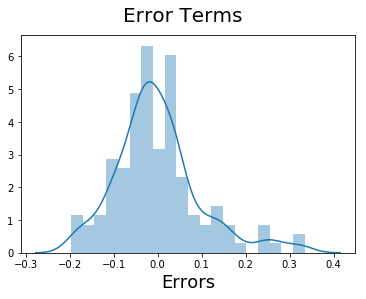

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - price_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

###  Applying the scaling on the test sets

In [95]:
num_vars = ['carlength','carwidth','carheight','curbweight','wheelbase','boreratio','compressionratio',
            'horsepower','peakrpm','citympg','highwaympg','price','stroke','enginesize']

In [96]:
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])


In [97]:
## Dividing into X and Y in test data set to test the model building

y_test=df_test.pop('price')

X_test=df_test




In [98]:
# Now let's use our model lm21 to make predictions.
x_train_final = x_train_lm21.drop(['const'],axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[x_train_final.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_test_pred = lm21.predict(X_test_new)


## Model Evaluation

Text(0,0.5,'y_pred')

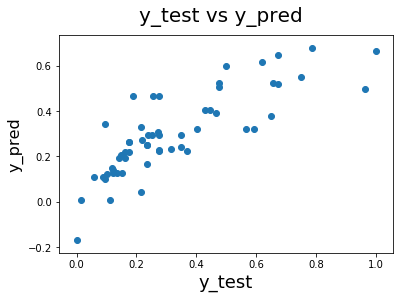

In [99]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [100]:
mse_test = mean_squared_error(y_test,y_test_pred)
r_squared_test = r2_score(y_test,y_test_pred)
print('Mean_Squared_Error_test :' ,mse_test)
print('r_square_value_test :',r_squared_test)

Mean_Squared_Error_test : 0.01856169644401555
r_square_value_test : 0.6570844433349363


In [101]:
print('RMSE_test',np.sqrt(r_squared_test))

RMSE_test 0.8106074532934769


In [102]:
print(r2_score(y_test,y_test_pred))

0.6570844433349363


## Conclusion
This analysis has shown that the price of an automobile can be confidently predicted from its
characteristics. In particular, the manufacturer(Volvo,audi,bmw,buick), wheel base, engine size, city MPG, and
drive wheels(rwd)have a significant effect on the price of an automobile. Secondary features, such as fuel
type can help further classify automobiles and determine price groupings to which they belong. 
